# Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the
[I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).The dataset is available [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

When we refer the [documentation of the dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) we can see that the station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.


In [1]:
#Read the dataset

import pandas as pd
IS_Traffic=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

#Examine the first and last five rows
IS_Traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [2]:
#Information about the data
IS_Traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


When we look at the information about the data we can see that we have 48204 rows and 9 columns.
The data does not seem to have any null values.

# Analyze distribution of Traffic Volume
To visualize the distribution of traffic column we can plot a histogram.

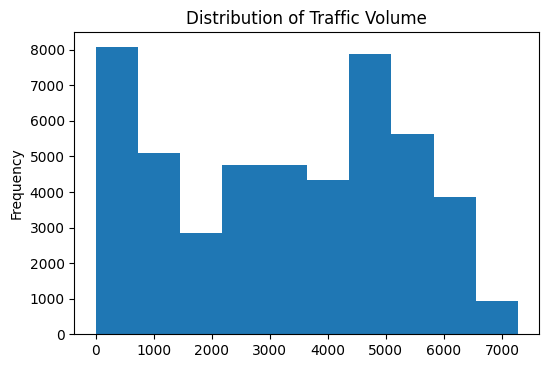

In [3]:
#Import the matplotlib library and pyplot submodule
import matplotlib.pyplot as plt
%matplotlib inline 
#This line allows Jupyter to generate graphs.Done once
                
#Plot a histogram using pandas
IS_Traffic["traffic_volume"].plot.hist()
plt.title("Distribution of Traffic Volume")
plt.show()



In [4]:
#Information about the traffic volume column
IS_Traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the histogram and information about the traffic column we can see that:
1. The values have ranged from 0 to 7280 cars with an average of 3260 cars.
2. About 25% of the times the traffic volume was ~1193 cars and about 75% of the times it was 4933 cars. 

## Analyzing traffic volume difference in day and night
Looking at the distribution of the traffic volume we can look into the data if there are certain times in the day when there is lower or higher traffic.
Let us try using the date_time column to classify the time as day or night.

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)
While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [5]:
# Convert the date_time column from string to datetime
IS_Traffic["date_time"]=pd.to_datetime(IS_Traffic["date_time"])

#Extract the hoour from every instance and isolate the daytime and nighttime data
import datetime as dt
print(IS_Traffic["date_time"].dt.hour.unique())

#Isolate daytime data
daytime_data=IS_Traffic.copy()[(IS_Traffic["date_time"].dt.hour.between(7,18))]
#Isolate nighttime data
nighttime_data=IS_Traffic.copy()[(~(IS_Traffic["date_time"].dt.hour.between(7,18)))]

print(daytime_data.shape)
print(nighttime_data.shape)

[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  8  7]
(23877, 9)
(24327, 9)


From the above we can see that there is a significant difference between number of rows for day and night.That could be due to data which was not recorded for specific hours due to some issue.

(0.0, 8000.0)

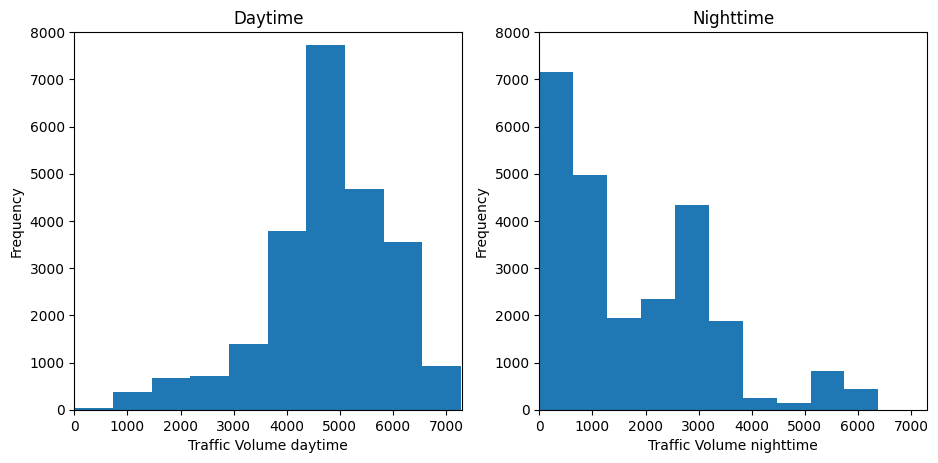

In [6]:
#Histograms of traffic volume for day and night
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
daytime_data["traffic_volume"].plot.hist()
plt.title("Daytime")
plt.xlabel("Traffic Volume daytime")
plt.ylabel("Frequency")
plt.xlim((0,7300))
plt.ylim((0,8000))
plt.subplot(1,2,2)
nighttime_data["traffic_volume"].plot.hist()
plt.title("Nighttime")
plt.xlabel("Traffic Volume nighttime")
plt.ylabel("Frequency")
plt.xlim((0,7300))
plt.ylim((0,8000))




In [7]:
#Information about the traffic volume in daytime
daytime_data["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
#Information about data in night time
nighttime_data["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

When we look at the histograms for both day and night time and also the statistics we can say that:
1. The range of values for traffic volume lies between 0 to 7280 for daytime. The range for nighttime values is  0 to 6386.
2. The distribution shows that the values are centered between 4000 to 6500 cars for daytime.While for nightime the values are mostly concentrated between 0 to 500.
3. The histogram for daytime suggests it to be a positively skewed distribution suggesting most values lie on the higher side.While the distribution for night time shows it is a negatively skewed distribution suggesting that most values lie on the lower side.

The above observations suggest that traffic is light at night.However the goal of our analysis is to find the indicators of heavy traffic.Hence it will be best to exclude the data for night time from our analysis.
 

## Analyzing the traffic volume change as per time
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day


**Analyzing the traffic volume change as per month**

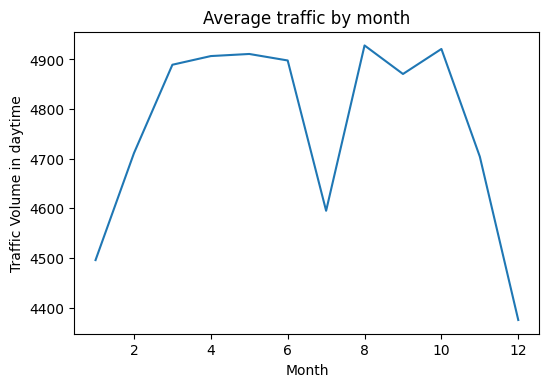

In [9]:
# Analyzing traffic volume change by month

# Group data by month
daytime_data['month'] = daytime_data["date_time"].dt.month
by_month =daytime_data.groupby('month').mean()

by_month["traffic_volume"].plot.line()
plt.title("Average traffic by month")
plt.xlabel("Month")
plt.ylabel("Traffic Volume in daytime")
plt.show()



From the abve graph we can see that traffic is comparitively lower in the daytime in Jan,Feb,November and December months which are cold season months compared to March to October months which are warm season months.However surprisingly we can see that the month of July has seen a dip.We will dig down further deeper in the July month.

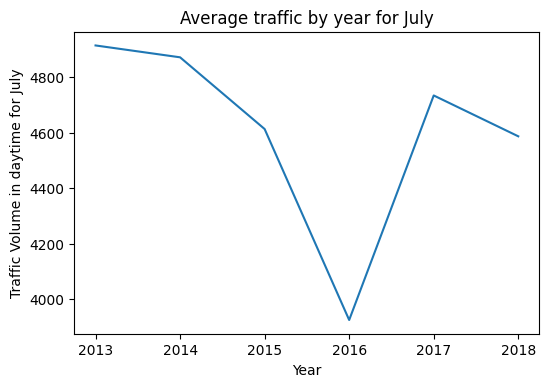

In [10]:
# Analysing yearly data for July

only_July=daytime_data.copy()[daytime_data["month"]==7]
only_July["year"]=only_July["date_time"].dt.year
by_year_July = only_July.groupby('year').mean()

by_year_July["traffic_volume"].plot.line()
plt.title("Average traffic by year for July")
plt.xlabel("Year")
plt.ylabel("Traffic Volume in daytime for July")
plt.show()




The traffic seems to be heavy in July similar to other warm months.However the only exception is in the year 2016.[This article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) says that there was some road construction activity carried out in 2016 leading to lower traffic in July 2016.

**Conclusion:**
*Thus on a overall basis we can say that colder months have light traffic in daytime compared to warmer months*

**Analyzing the traffic change as per day of week**

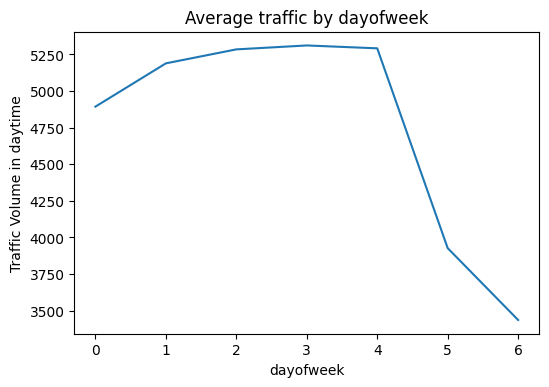

In [11]:
#Extract the day of the week and compute avg traffic per day of week
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek #0 is Monday 6 is Sunday
by_dayofweek = daytime_data.groupby('dayofweek').mean()

by_dayofweek["traffic_volume"].plot.line()
plt.title("Average traffic by dayofweek")
plt.xlabel("dayofweek")
plt.ylabel("Traffic Volume in daytime")
plt.show()


**Conclusion**:
*The above plot suggests that the traffic in daytime is higher on weekdays which is Monday to Saturday than on weekends which is Saturday and Sunday.*

**Analyze traffic volume by time of the day**

We already saw that traffic volumne is higher on weekdays than weekends.
We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.


In [12]:
#Splitting the data for weekdays and weekends
daytime_data['hour'] = daytime_data['date_time'].dt.hour
weekdays = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_weekdays = weekdays.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

(0.0, 7000.0)

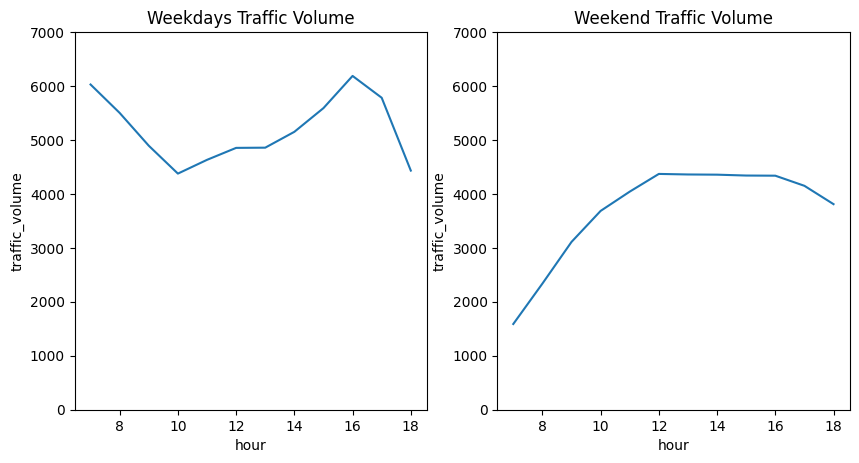

In [13]:
#Plotting traffic by hour tofor weekdays and weekends
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
by_hour_weekdays["traffic_volume"].plot.line()
plt.title("Weekdays Traffic Volume")
plt.xlabel("hour")
plt.ylabel("traffic_volume")
plt.ylim((0,7000))

plt.subplot(1,2,2)
by_hour_weekend["traffic_volume"].plot.line()
plt.title("Weekend Traffic Volume")
plt.xlabel("hour")
plt.ylabel("traffic_volume")
plt.ylim((0,7000))

**Conclusion:**

1. In weekdays during daytime the traffic is higher in the morning from 7 to 8am and in the evening from 4 to 5pm.This could be because from people commuting to office in the morning and returning back home in the evening.

2. In weekends during daytime we can see that overall the the traffic is low compared to weekends as already seen.Traffic starts increasing gradually from 10 am.This could be because at weekends generally offices are closed and people avoid commuting early morning.



# Analyzing the traffic volume change as per weather

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [14]:
#Computing the correlation of weather columns with traffic volume
daytime_data.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Looking at the above table we can conclude that temperature is the most correlated column with traffic volume.Other numeric columns like rain_1h,snow_1h and clouds_all do not show any strong correlation with traffic.
Let us plot a scatter plot for traffic and temperature.

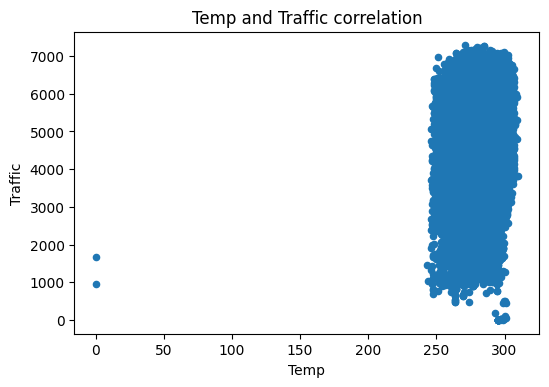

In [15]:
#Scatter plot for traffic and temperature
daytime_data.plot.scatter("temp","traffic_volume")
plt.title("Temp and Traffic correlation")
plt.xlabel("Temp")
plt.ylabel("Traffic")
plt.show()


When we look at the above graph we can see that there are two values of 0 for temp which are giving us a wrong picture.Also the values for temp are mostly between 250 and 300.Hence we can get rid of them by setting limits for x axis.

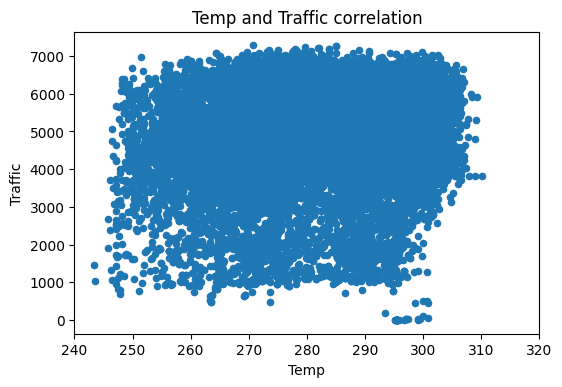

In [16]:
#Remove 0 temp values
daytime_data.plot.scatter("temp","traffic_volume")
plt.title("Temp and Traffic correlation")
plt.xlabel("Temp")
plt.ylabel("Traffic")
plt.xlim((240,320)),
plt.show()


The scatterplot is not showing any clear pattern and it seems to be pretty random.Hence we can conclude that temperature is not really affecting traffic volumes.

Since numerical columns did not really show any weather indicators for traffic let's look at weather related columns weather_main and weather_description.We will be calculating average traffic associated with every value in these two columns.

In [17]:
#Grouping the data for weather_main and weather_description
by_weather_main = daytime_data.groupby('weather_main').mean()

by_weather_description = daytime_data.groupby('weather_description').mean()


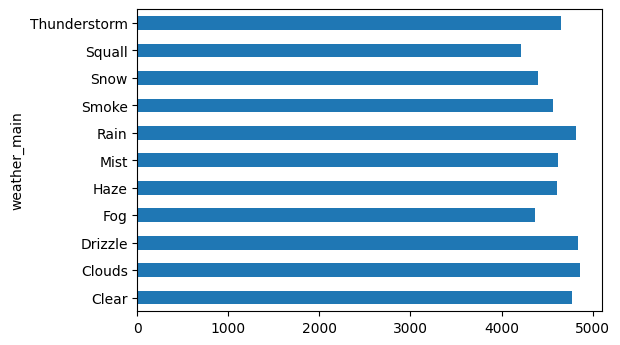

In [18]:
#Barplot for weather main column
by_weather_main["traffic_volume"].plot.barh()
plt.show()

The above plot does not really show any particular weather where there is heavier trafffic.
Let's look at the weather description column which was more elaborate data.

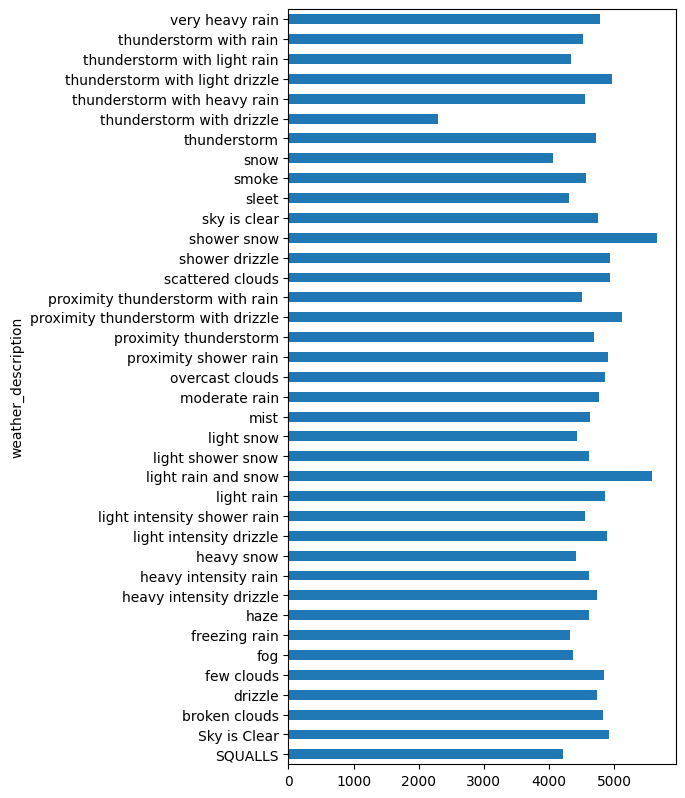

In [19]:
#Barplot for weather_description  column
by_weather_description["traffic_volume"].plot.barh(figsize=(5,10))
plt.show()

From the above we can see that the following types of weather have high traffic:
1. shower snow
2. light rain and snow
3. drizzle

These weathers are bad but not that bad.It could be the reason that people avoid walking or biking in bad weathers when a car is safe to be taken out.

# Conclusion:

From the above analysis we have come up with two major sections which drive heavier traffic mainly *Time* and *Weather*:

**Time**
1. Traffic is heavier in daytime than night time. 
2. Colder months(Jan-Dec) have lighter traffic than warmer months(Mar-Oct).
3. Weekdays have higher traffic than weekends. The high traffic hours for weekdays are 7am to 8am and 4pm to 5pm.

**Weather**
 
 The following types of weather have high traffic:
1. shower snow
2. light rain and snow
3. drizzle
